In [1]:
# voting method
# If we considered 1 vote (Vote_1 scheme), a positive label was given only if one or more models were giving a positive label.
# 算accuracy、recall、specificity、precision、f1、kappa
import os
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, cohen_kappa_score
import matplotlib.pyplot as plt

algorithm_list = ['KNN', 'NB', 'RF', 'SVC', 'XGBoost', 'AttentiveFP', 'chemberta', 'DMPNN', 'GCN']


In [7]:
# 整合全部单模型结果

# all_df = pd.read_excel('./pred_proba/all.xlsx')

# for i in algorithm_list:
#     result1 = pd.read_excel('./pred_proba/' + i + '_pred_proba.xlsx')['y_pred']
#     all_df[i] = result1

# all_df.to_excel('./voting/all.xlsx',index=False)


# scheme_list = [1,2,3,4,5,6,7,8,9]
# df = pd.read_excel('./voting/all.xlsx')


# for i in scheme_list:
#     column_name = 'scheme_' + str(i)
#     df[column_name] = (df.iloc[:, 4:13] > 0).sum(axis=1) >= i
#     df[column_name] = df[column_name].astype(int)

# df.to_excel('./voting/all1.xlsx',index=False)

In [2]:
scheme_list = [1,2,3,4,5,6,7,8,9]
df = pd.read_excel('./voting/all1.xlsx')

dataset_accuracy_scores={}
dataset_recall_scores={}
dataset_specificity_scores={}
dataset_precision_scores={}
dataset_f1_scores={}
dataset_kappa_scores={}


for i in scheme_list:
    name = 'scheme_'+str(i)
    print(name)
    grouped = df.groupby(['dataset', 'target'])

    print('accuracy: ')
    accuracy_scores = {}
    for (dataset, target), group in grouped:
        if len(set(group['y_test'])) > 1:
            accuracy_scores.setdefault(dataset, []).append(accuracy_score(group['y_test'], group[name]))
    dataset_accuracy_scores[name] = {dataset: sum(accuracy_scores[dataset]) / len(accuracy_scores[dataset]) for dataset in accuracy_scores}
    for dataset, acc_score in dataset_accuracy_scores[name].items():
        print(f"{dataset}: {acc_score}")
    print('\n')

    print('recall: ')
    recall_scores = {}
    for (dataset, target), group in grouped:
        if len(set(group['y_test'])) > 1:
            recall_scores.setdefault(dataset, []).append(recall_score(group['y_test'], group[name]))
    dataset_recall_scores[name] = {dataset: sum(recall_scores[dataset]) / len(recall_scores[dataset]) for dataset in recall_scores}
    for dataset, rec_score in dataset_recall_scores[name].items():
        print(f"{dataset}: {rec_score}")
    print('\n')

    print('specificity: ')
    specificity_scores = {}
    for (dataset, target), group in grouped:
        if len(set(group['y_test'])) > 1:
            specificity_scores.setdefault(dataset, []).append(recall_score(group['y_test'], group[name], pos_label=0))
    dataset_specificity_scores[name] = {dataset: sum(specificity_scores[dataset]) / len(specificity_scores[dataset]) for dataset in specificity_scores}
    for dataset, spe_score in dataset_specificity_scores[name].items():
        print(f"{dataset}: {spe_score}")
    print('\n')

    print('precision: ')
    precision_scores = {}
    for (dataset, target), group in grouped:
        if len(set(group['y_test'])) > 1:
            precision_scores.setdefault(dataset, []).append(precision_score(group['y_test'], group[name], zero_division=1))
    dataset_precision_scores[name] = {dataset: sum(precision_scores[dataset]) / len(precision_scores[dataset]) for dataset in precision_scores}
    for dataset, pre_score in dataset_precision_scores[name].items():
        print(f"{dataset}: {pre_score}")
    print('\n')

    print('f1: ')
    f1_scores = {}
    for (dataset, target), group in grouped:
        if len(set(group['y_test'])) > 1:
            f1_scores.setdefault(dataset, []).append(f1_score(group['y_test'], group[name]))
    dataset_f1_scores[name] = {dataset: sum(f1_scores[dataset]) / len(f1_scores[dataset]) for dataset in f1_scores}
    for dataset, f1_score_ in dataset_f1_scores[name].items():
        print(f"{dataset}: {f1_score_}")
    print('\n')

    print('kappa: ')
    kappa_scores = {}
    for (dataset, target), group in grouped:
        if len(set(group['y_test'])) > 1:
            kappa_scores.setdefault(dataset, []).append(cohen_kappa_score(group['y_test'], group[name]))
    dataset_kappa_scores[name] = {dataset: sum(kappa_scores[dataset]) / len(kappa_scores[dataset]) for dataset in kappa_scores}
    for dataset, kap_score in dataset_kappa_scores[name].items():
        print(f"{dataset}: {kap_score}")
    print('\n')

dataset_names = ['TCM2000_100t', 'TCM2000_30t', 'TCM2000_50t', 'TCM2000_80t', 'TCM_100t', 'TCM_30t', 'TCM_50t', 'TCM_80t']

df_acc = pd.DataFrame(dataset_accuracy_scores)
df_acc.insert(0, 'Dataset Name', dataset_names)
df_acc.to_excel('./voting/accuracy.xlsx', index=False)

df_rec = pd.DataFrame(dataset_recall_scores)
df_rec.insert(0, 'Dataset Name', dataset_names)
df_rec.to_excel('./voting/recall.xlsx', index=False)

df_spe = pd.DataFrame(dataset_specificity_scores)
df_spe.insert(0, 'Dataset Name', dataset_names)
df_spe.to_excel('./voting/specificity.xlsx', index=False)

df_pre = pd.DataFrame(dataset_precision_scores)
df_pre.insert(0, 'Dataset Name', dataset_names)
df_pre.to_excel('./voting/precision.xlsx', index=False)

df_f1 = pd.DataFrame(dataset_f1_scores)
df_f1.insert(0, 'Dataset Name', dataset_names)
df_f1.to_excel('./voting/f1.xlsx', index=False)

df_kap = pd.DataFrame(dataset_kappa_scores)
df_kap.insert(0, 'Dataset Name', dataset_names)
df_kap.to_excel('./voting/kappa.xlsx', index=False)

scheme_1
accuracy: 
TCM2000_100t: 0.6835222697149334
TCM2000_30t: 0.6993779718233882
TCM2000_50t: 0.7011228993210445
TCM2000_80t: 0.7157993842793519
TCM_100t: 0.6354226316032245
TCM_30t: 0.7107697982358037
TCM_50t: 0.7082340063999718
TCM_80t: 0.6725482174377507


recall: 
TCM2000_100t: 0.7887218960810868
TCM2000_30t: 0.8591630306113883
TCM2000_50t: 0.8393074285340213
TCM2000_80t: 0.8272790737589653
TCM_100t: 0.7221602491412079
TCM_30t: 0.8548286609887411
TCM_50t: 0.7888307338108311
TCM_80t: 0.8062632435430314


specificity: 
TCM2000_100t: 0.34882284382284384
TCM2000_30t: 0.21104890723311778
TCM2000_50t: 0.29071006091414253
TCM2000_80t: 0.38849018797294654
TCM_100t: 0.3831791600212653
TCM_30t: 0.21073020117137764
TCM_50t: 0.30511446511446516
TCM_80t: 0.3068661338661338


precision: 
TCM2000_100t: 0.6664618841621129
TCM2000_30t: 0.7188840524798371
TCM2000_50t: 0.7383178738198554
TCM2000_80t: 0.7013601839714619
TCM_100t: 0.6126114311533377
TCM_30t: 0.7285354946189377
TCM_50t: 0.7081146549

In [3]:
# 对比单个模型

algorithm_list = ['KNN', 'NB', 'RF', 'SVC', 'XGBoost', 'AttentiveFP', 'chemberta', 'DMPNN', 'GCN']


df = pd.read_excel('./voting/all1.xlsx')

max_acc_scores = {'TCM2000_100t': 0,
'TCM2000_30t': 0,
'TCM2000_50t': 0,
'TCM2000_80t': 0,
'TCM_100t': 0,
'TCM_30t': 0,
'TCM_50t': 0,
'TCM_80t': 0}

print('accuracy: ')
for i in algorithm_list:
    name = i
    print(name)
    grouped = df.groupby(['dataset', 'target'])
    accuracy_scores = {}
    for (dataset, target), group in grouped:
        if len(set(group['y_test'])) > 1:
            score = accuracy_score(group['y_test'], group[name])
            accuracy_scores.setdefault(dataset, []).append(score)
    dataset_accuracy_scores = {dataset: sum(accuracy_scores[dataset]) / len(accuracy_scores[dataset]) for dataset in accuracy_scores}
    for dataset, acc_score in dataset_accuracy_scores.items():
        if max_acc_scores[dataset] < acc_score:
            max_acc_scores[dataset] = acc_score
        print(f"{dataset}: {acc_score}")
    print('\n')
print(max_acc_scores)


max_rec_scores = {'TCM2000_100t': 0,
'TCM2000_30t': 0,
'TCM2000_50t': 0,
'TCM2000_80t': 0,
'TCM_100t': 0,
'TCM_30t': 0,
'TCM_50t': 0,
'TCM_80t': 0}

print('recall: ')
for i in algorithm_list:
    name = i
    print(name)
    grouped = df.groupby(['dataset', 'target'])
    recall_scores = {}
    for (dataset, target), group in grouped:
        if len(set(group['y_test'])) > 1:
            score = recall_score(group['y_test'], group[name])
            recall_scores.setdefault(dataset, []).append(score)
    dataset_recall_scores = {dataset: sum(recall_scores[dataset]) / len(recall_scores[dataset]) for dataset in recall_scores}
    for dataset, rec_score in dataset_recall_scores.items():
        if max_rec_scores[dataset] < rec_score:
            max_rec_scores[dataset] = rec_score
        print(f"{dataset}: {rec_score}")
    print('\n')
print(max_rec_scores)


max_spe_scores = {'TCM2000_100t': 0,
'TCM2000_30t': 0,
'TCM2000_50t': 0,
'TCM2000_80t': 0,
'TCM_100t': 0,
'TCM_30t': 0,
'TCM_50t': 0,
'TCM_80t': 0}

print('specificity: ')
for i in algorithm_list:
    name = i
    print(name)
    grouped = df.groupby(['dataset', 'target'])
    specificity_scores = {}
    for (dataset, target), group in grouped:
        if len(set(group['y_test'])) > 1:
            score = recall_score(group['y_test'], group[name], pos_label=0)
            specificity_scores.setdefault(dataset, []).append(score)
    dataset_specificity_scores = {dataset: sum(specificity_scores[dataset]) / len(specificity_scores[dataset]) for dataset in specificity_scores}
    for dataset, spe_score in dataset_specificity_scores.items():
        if max_spe_scores[dataset] < spe_score:
            max_spe_scores[dataset] = spe_score
        print(f"{dataset}: {spe_score}")
    print('\n')
print(max_spe_scores)


max_pre_scores = {'TCM2000_100t': 0,
'TCM2000_30t': 0,
'TCM2000_50t': 0,
'TCM2000_80t': 0,
'TCM_100t': 0,
'TCM_30t': 0,
'TCM_50t': 0,
'TCM_80t': 0}

print('precision: ')
for i in algorithm_list:
    name = i
    print(name)
    grouped = df.groupby(['dataset', 'target'])
    precision_scores = {}
    for (dataset, target), group in grouped:
        if len(set(group['y_test'])) > 1:
            score = precision_score(group['y_test'], group[name], zero_division=1)
            precision_scores.setdefault(dataset, []).append(score)
    dataset_precision_scores = {dataset: sum(precision_scores[dataset]) / len(precision_scores[dataset]) for dataset in precision_scores}
    for dataset, pre_score in dataset_precision_scores.items():
        if max_pre_scores[dataset] < pre_score:
            max_pre_scores[dataset] = pre_score
        print(f"{dataset}: {pre_score}")
    print('\n')
print(max_pre_scores)


max_f1_scores = {'TCM2000_100t': 0,
'TCM2000_30t': 0,
'TCM2000_50t': 0,
'TCM2000_80t': 0,
'TCM_100t': 0,
'TCM_30t': 0,
'TCM_50t': 0,
'TCM_80t': 0}

print('f1: ')
for i in algorithm_list:
    name = i
    print(name)
    grouped = df.groupby(['dataset', 'target'])
    f1_scores = {}
    for (dataset, target), group in grouped:
        if len(set(group['y_test'])) > 1:
            score = f1_score(group['y_test'], group[name])
            f1_scores.setdefault(dataset, []).append(score)
    dataset_f1_scores = {dataset: sum(f1_scores[dataset]) / len(f1_scores[dataset]) for dataset in f1_scores}
    for dataset, f1_score_ in dataset_f1_scores.items():
        if max_f1_scores[dataset] < f1_score_:
            max_f1_scores[dataset] = f1_score_
        print(f"{dataset}: {f1_score_}")
    print('\n')
print(max_f1_scores)


max_kappa_scores = {'TCM2000_100t': 0,
'TCM2000_30t': 0,
'TCM2000_50t': 0,
'TCM2000_80t': 0,
'TCM_100t': 0,
'TCM_30t': 0,
'TCM_50t': 0,
'TCM_80t': 0}

print('kappa: ')
for i in algorithm_list:
    name = i
    print(name)
    grouped = df.groupby(['dataset', 'target'])
    kappa_scores = {}
    for (dataset, target), group in grouped:
        if len(set(group['y_test'])) > 1:
            score = cohen_kappa_score(group['y_test'], group[name])
            kappa_scores.setdefault(dataset, []).append(score)
    dataset_kappa_scores = {dataset: sum(kappa_scores[dataset]) / len(kappa_scores[dataset]) for dataset in kappa_scores}
    for dataset, kappa_score in dataset_kappa_scores.items():
        if max_kappa_scores[dataset] < kappa_score:
            max_kappa_scores[dataset] = kappa_score
        print(f"{dataset}: {kappa_score}")
    print('\n')
print(max_kappa_scores)


accuracy: 
KNN
TCM2000_100t: 0.5812859410311509
TCM2000_30t: 0.6093629028740288
TCM2000_50t: 0.6033517514130886
TCM2000_80t: 0.6051080195514905
TCM_100t: 0.5450260534845746
TCM_30t: 0.582102707067392
TCM_50t: 0.5788553012283054
TCM_80t: 0.535177655054407


NB
TCM2000_100t: 0.614937123680549
TCM2000_30t: 0.6234298551881385
TCM2000_50t: 0.6466605760299722
TCM2000_80t: 0.6458699813323061
TCM_100t: 0.5998455385367777
TCM_30t: 0.5860133592594421
TCM_50t: 0.608129267180294
TCM_80t: 0.5968465133008568


RF
TCM2000_100t: 0.5648422943100442
TCM2000_30t: 0.6234264545591013
TCM2000_50t: 0.60312797460361
TCM2000_80t: 0.6228186951590163
TCM_100t: 0.5554117115479623
TCM_30t: 0.608219451986558
TCM_50t: 0.6215381256611285
TCM_80t: 0.5783068166053051


SVC
TCM2000_100t: 0.5589251078436586
TCM2000_30t: 0.6107932116168503
TCM2000_50t: 0.6049154400366221
TCM2000_80t: 0.6087536508154802
TCM_100t: 0.5858793120097745
TCM_30t: 0.5915545127412364
TCM_50t: 0.6365838618233222
TCM_80t: 0.5824084263510626


XGBoos

TCM2000_80t 0.6726730032234219
{'scheme_1': 0.7157993842793519, 'scheme_2': 0.68895904404925, 'scheme_3': 0.6614166985281953, 'scheme_5': 0.6440137617377458, 'scheme_4': 0.6345567879058881, 'scheme_6': 0.6082455845747525, 'scheme_7': 0.5900115444345763, 'scheme_8': 0.5270830418369188, 'scheme_9': 0.4845744686859464}


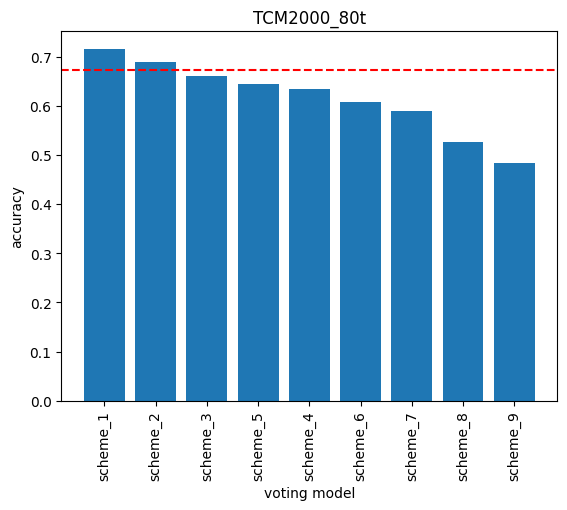

TCM2000_80t 0.5779142040889294
{'scheme_1': 0.8272790737589653, 'scheme_2': 0.6666837612237878, 'scheme_3': 0.5605122055189128, 'scheme_4': 0.477114568787269, 'scheme_5': 0.4481123577396922, 'scheme_6': 0.3833439665044477, 'scheme_7': 0.3387440372615966, 'scheme_8': 0.2376320107736007, 'scheme_9': 0.164954248772869}


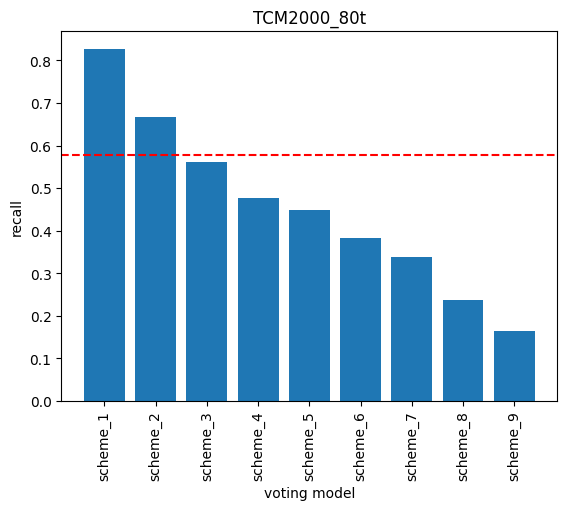

TCM2000_80t 0.8980639941785479
{'scheme_9': 0.9863419084108739, 'scheme_8': 0.9712579028476596, 'scheme_7': 0.9256527877073928, 'scheme_6': 0.8978287203875424, 'scheme_5': 0.8750878240533413, 'scheme_4': 0.841337041113276, 'scheme_3': 0.7751290025354819, 'scheme_2': 0.7379209824385692, 'scheme_1': 0.7013601839714619}


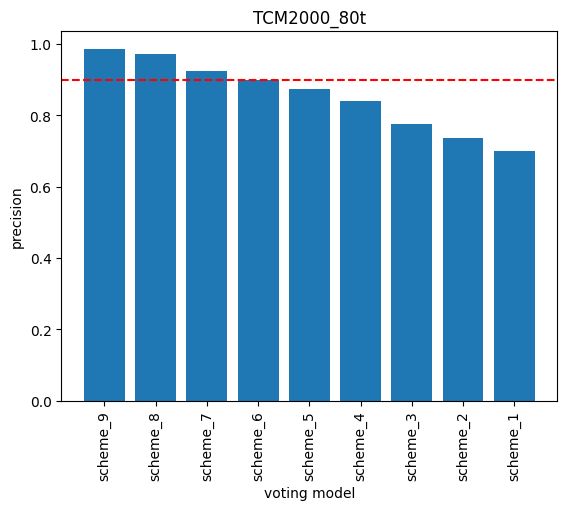

TCM2000_80t 0.6084179977042343
{'scheme_1': 0.7378388300663153, 'scheme_2': 0.6581018274011291, 'scheme_3': 0.5938512883219694, 'scheme_4': 0.5328657821891484, 'scheme_5': 0.5135110218179233, 'scheme_6': 0.4411779948481563, 'scheme_7': 0.3963703813343576, 'scheme_8': 0.2840729718981382, 'scheme_9': 0.2104077691690483}


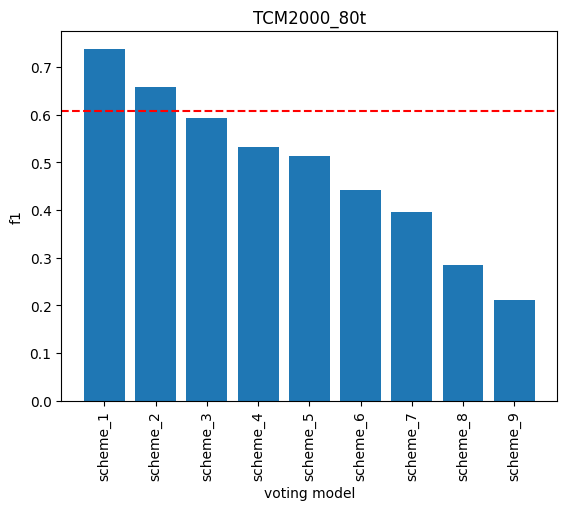

TCM2000_80t 0.21204025425075992
{'scheme_1': 0.1586635990080804, 'scheme_5': 0.1562425514420041, 'scheme_7': 0.1523987042514459, 'scheme_6': 0.1516158608625323, 'scheme_2': 0.1297107463348475, 'scheme_3': 0.1050525176905202, 'scheme_4': 0.08627177389843835, 'scheme_8': 0.08394447250748291, 'scheme_9': 0.05714887215316872}


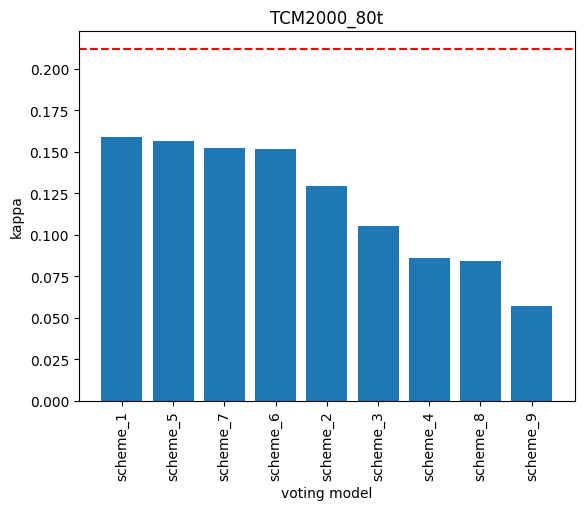

In [19]:
df = pd.read_excel("./voting/accuracy.xlsx")
for key, value in max_acc_scores.items():

    # 只关注TCM2000_80t
    if key == 'TCM2000_80t':
        print(key,value)
        dict1 = df.iloc[3].to_dict()
        dict1.pop('Dataset Name')
        dict1 = dict(sorted(dict1.items(), key=lambda item: item[1], reverse=True))
        # 只保留前十个键值对
        # dict1 = dict(list(dict1.items())[:10])
        
        print(dict1)

        keys = list(dict1.keys())
        values = list(dict1.values())

        # 创建柱状图
        plt.bar(keys, values)

        # 添加标题和标签
        plt.title(key)
        plt.xlabel('voting model')
        plt.ylabel('accuracy')
        plt.xticks(rotation=90)
        plt.axhline(y=value, color='r', linestyle='--')


        plt.show()

df = pd.read_excel("./voting/recall.xlsx")
for key, value in max_rec_scores.items():

    # 只关注TCM2000_80t
    if key == 'TCM2000_80t':
        print(key,value)
        dict1 = df.iloc[3].to_dict()
        dict1.pop('Dataset Name')
        dict1 = dict(sorted(dict1.items(), key=lambda item: item[1], reverse=True))
        # 只保留前十个键值对
        # dict1 = dict(list(dict1.items())[:10])
        
        print(dict1)

        keys = list(dict1.keys())
        values = list(dict1.values())

        # 创建柱状图
        plt.bar(keys, values)

        # 添加标题和标签
        plt.title(key)
        plt.xlabel('voting model')
        plt.ylabel('recall')
        plt.xticks(rotation=90)
        plt.axhline(y=value, color='r', linestyle='--')


        plt.show()

df = pd.read_excel("./voting/precision.xlsx")
for key, value in max_pre_scores.items():

    # 只关注TCM2000_80t
    if key == 'TCM2000_80t':
        print(key,value)
        dict1 = df.iloc[3].to_dict()
        dict1.pop('Dataset Name')
        dict1 = dict(sorted(dict1.items(), key=lambda item: item[1], reverse=True))
        # 只保留前十个键值对
        # dict1 = dict(list(dict1.items())[:10])
        
        print(dict1)

        keys = list(dict1.keys())
        values = list(dict1.values())

        # 创建柱状图
        plt.bar(keys, values)

        # 添加标题和标签
        plt.title(key)
        plt.xlabel('voting model')
        plt.ylabel('precision')
        plt.xticks(rotation=90)
        plt.axhline(y=value, color='r', linestyle='--')


        plt.show()

df = pd.read_excel("./voting/f1.xlsx")
for key, value in max_f1_scores.items():

    # 只关注TCM2000_80t
    if key == 'TCM2000_80t':
        print(key,value)
        dict1 = df.iloc[3].to_dict()
        dict1.pop('Dataset Name')
        dict1 = dict(sorted(dict1.items(), key=lambda item: item[1], reverse=True))
        # 只保留前十个键值对
        # dict1 = dict(list(dict1.items())[:10])
        
        print(dict1)

        keys = list(dict1.keys())
        values = list(dict1.values())

        # 创建柱状图
        plt.bar(keys, values)

        # 添加标题和标签
        plt.title(key)
        plt.xlabel('voting model')
        plt.ylabel('f1')
        plt.xticks(rotation=90)
        plt.axhline(y=value, color='r', linestyle='--')


        plt.show()

df = pd.read_excel("./voting/kappa.xlsx")
for key, value in max_kappa_scores.items():

    # 只关注TCM2000_80t
    if key == 'TCM2000_80t':
        print(key,value)
        dict1 = df.iloc[3].to_dict()
        dict1.pop('Dataset Name')
        dict1 = dict(sorted(dict1.items(), key=lambda item: item[1], reverse=True))
        # 只保留前十个键值对
        # dict1 = dict(list(dict1.items())[:10])
        
        print(dict1)

        keys = list(dict1.keys())
        values = list(dict1.values())

        # 创建柱状图
        plt.bar(keys, values)

        # 添加标题和标签
        plt.title(key)
        plt.xlabel('voting model')
        plt.ylabel('kappa')
        plt.xticks(rotation=90)
        plt.axhline(y=value, color='r', linestyle='--')


        plt.show()